# Water Potability Prediction

This time, the goal is to develop a hyperparameter search process for a Support Vector Machine (SVM) model.

It is strongly recommended to read the documentation.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

Reading CSV and Deleting Incomplete Rows.

In [2]:
df = pd.read_csv('waterPotability/water_potability.csv').dropna()
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0


Class Proportion Graph. Below you can see an imbalance between the data, so you are dealing with an imbalanced problem.


<Axes: ylabel='count'>

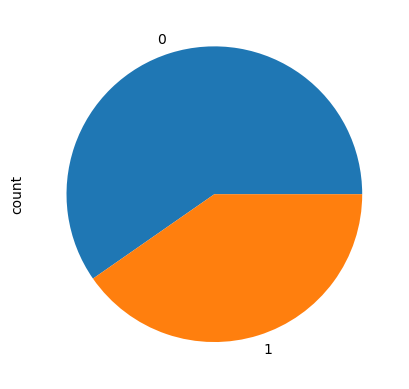

In [3]:
df['Potability'].value_counts().plot(kind='pie')

### Handling Imbalanced Data: Resampling

In [4]:
from sklearn.utils import resample
from sklearn.utils import shuffle

zero  = df[df['Potability']==0]   # clase 0
one = df[df['Potability']==1]  # clase 1

df_minority_upsampled = resample(one, replace = True, n_samples = 1200)
df = pd.concat([zero, df_minority_upsampled])

df = shuffle(df) # shuffling so that there is particular sequence

<Axes: ylabel='count'>

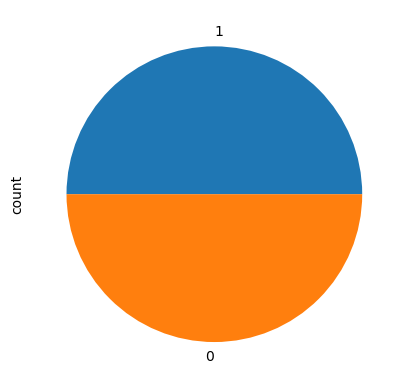

In [5]:
df['Potability'].value_counts().plot(kind='pie')

In [6]:
X = df.drop(['Potability'], axis = 1)
y = df['Potability']

In [7]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

### Splitting into Validation/Test Sets

Split the data (`X` and `y`) into sets of:

- Training (70%)
- Validation (15%)
- Test (15%)

Using `train_test_split`.


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=49)
X_valid, X_test, y_valid, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=49)

## Part 1: Model Evaluation and GridSearch

In the **Hyperparameters** folder, a GridSearch and RandomizedSearch process was performed. This time, we will again implement this procedure to find the best hyperparameters.

This time, we will **develop each of the cases manually and without using the SciKit-Learn library, obtain the best parameters for the VALIDATION data, and plot the history for the regularization parameter ranges.**

- Kernel: Linear, Polynomial (use degrees 1, 2, 3, and 4), Radial Basis Function (RBF), Sigmoid.
- Regularization Parameter: Traverse on a logarithmic scale from $10^{-3}$ to $10^{5}$.

Use the `SVC` function from `sklearn.svm` to define and fit each model.

### Hyperparameter Search with GridSearch

#### Case 1: Linear Kernel

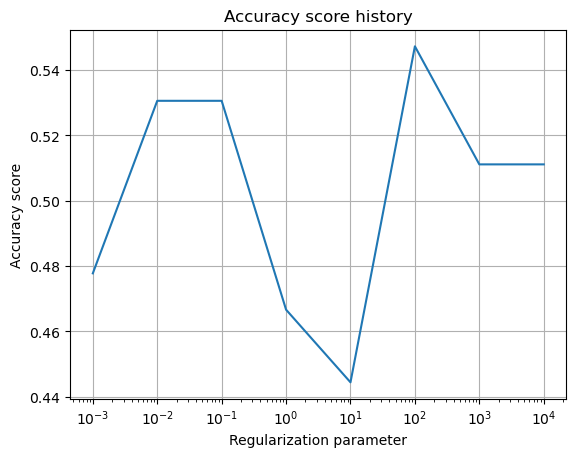

In [9]:
from sklearn import svm
from sklearn.metrics import accuracy_score

regularization = [10**-3, 10**-2, 10**-1, 1, 10, 100, 1000, 10**4]

#regularization_lin = [10**-3, 10**-2, 10**-1, 1, 10, 100, 1000]

accuracies_lin = []
for regu in regularization:
    classifier = svm.SVC(C=regu, kernel='linear')
    classifier.fit(X_train, y_train)

    # Predictions
    y_pred = classifier.predict(X_valid)
    accuracy = accuracy_score(y_valid, y_pred)

    accuracies_lin.append(accuracy)


plt.plot(regularization, accuracies_lin)
plt.grid()
plt.title('Accuracy score history')
plt.xlabel('Regularization parameter')
plt.ylabel('Accuracy score')
plt.xscale(value='log')

#### Case 2: Polynomial Kernel


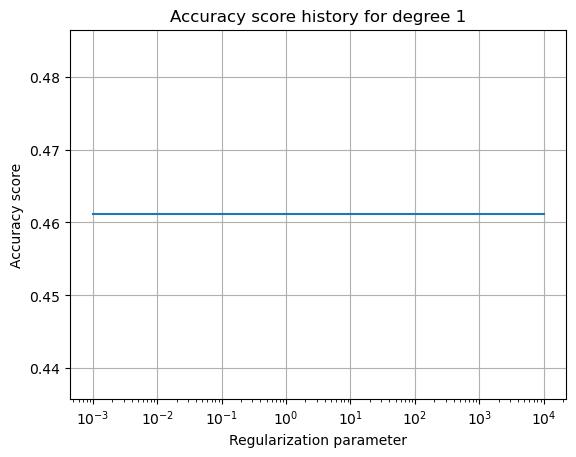

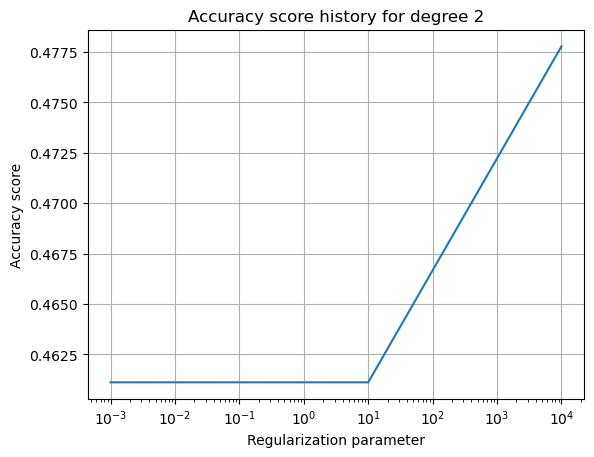

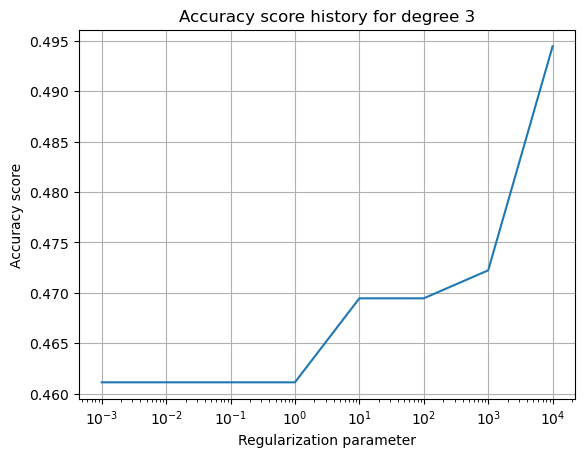

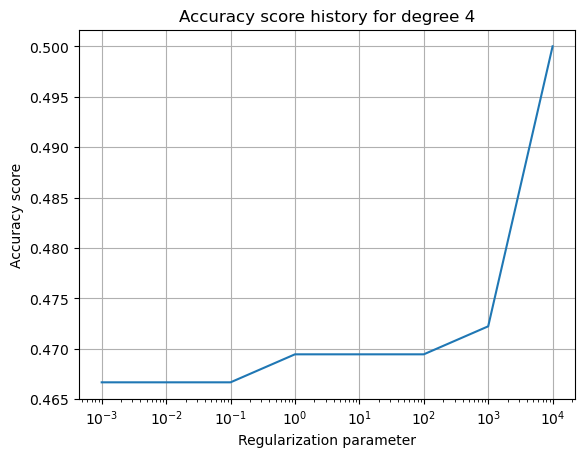

In [10]:
degrees = [1, 2, 3, 4]

accuracies_poly = []
for degree in degrees:
    for regu in regularization:
        clasif = svm.SVC(C=regu, kernel='poly', degree=degree)
        clasif.fit(X_train, y_train)

        # Predicciones
        y_pred = clasif.predict(X_valid)
        accuracy_poly = accuracy_score(y_valid, y_pred)

        accuracies_poly.append(accuracy_poly)

    plt.figure()
    plt.plot(regularization, accuracies_poly)
    plt.grid()
    plt.title(f'Accuracy score history for degree {degree}')
    plt.xlabel('Regularization parameter')
    plt.ylabel('Accuracy score')
    plt.xscale(value='log')

    accuracies_poly = []

#### Case 3: Radial Basis Function

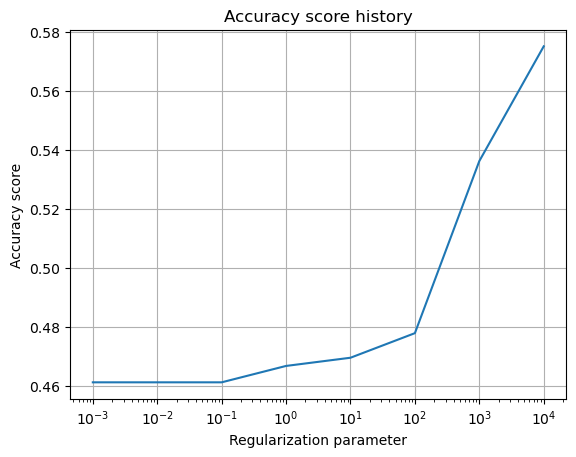

In [11]:
accuracies_radial = []
for regu in regularization:
    clasificador = svm.SVC(C=regu, kernel='rbf')
    clasificador.fit(X_train, y_train)

    # Predicciones
    y_pred = clasificador.predict(X_valid)
    accuracy = accuracy_score(y_valid, y_pred)

    accuracies_radial.append(accuracy)
    
plt.plot(regularization, accuracies_radial)
plt.grid()
plt.title('Accuracy score history')
plt.xlabel('Regularization parameter')
plt.ylabel('Accuracy score')
plt.xscale(value='log')

#### Case 4: Sigmoid Kernel

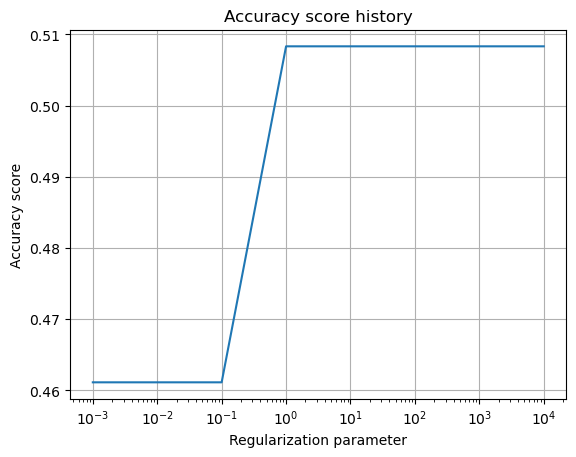

In [12]:
accuracies_sigmoid = []
for regu in regularization:
    clasificador = svm.SVC(C=regu, kernel='sigmoid')
    clasificador.fit(X_train, y_train)

    # Predicciones
    y_pred = clasificador.predict(X_valid)
    accuracy = accuracy_score(y_valid, y_pred)

    accuracies_sigmoid.append(accuracy)
    
plt.plot(regularization, accuracies_sigmoid)
plt.grid()
plt.title('Accuracy score history')
plt.xlabel('Regularization parameter')
plt.ylabel('Accuracy score')
plt.xscale(value='log')

## Part 2: Results Analysis

Now, based on the previous results, we evaluate the best model and conclude on its relevance within the context of this problem.


In [13]:
from sklearn.metrics import classification_report

best_classifier = SVC(C=10**4, kernel='rbf') # Classifier parameters #
best_classifier.fit(X_train, y_train)    

y_pred_rf = best_classifier.predict(X_test)

# Evaluación
print(f"Best classifier: {accuracy_score(y_test,y_pred_rf)}")
print(f"Classification report:\n{classification_report(y_test, y_pred_rf)}")

Best classifier: 0.575
Classification report:
              precision    recall  f1-score   support

           0       0.55      0.80      0.65       179
           1       0.64      0.35      0.46       181

    accuracy                           0.57       360
   macro avg       0.59      0.58      0.55       360
weighted avg       0.60      0.57      0.55       360



## Conclusions

The selection of hyperparameters that determine the hyperplane separating the data was found using SVM, which uses mathematical functions defined as kernels. The kernel is crucial in selecting these hyperparameters, so it should be chosen depending on the context of the problem being addressed. Remember that the best hyperparameters are those that define the hyperplane such that the classification margin is maximized, meaning when the distance between the points and the hyperplane is greater (more information [here](https://medium.com/all-things-ai/in-depth-parameter-tuning-for-svc-758215394769)). For this case, four types of kernels were used. First, the Linear Kernel is mainly used for linearly separable data. Second, the Polynomial Kernel is a more generalized representation of the Linear Kernel and is commonly employed in image processing. Third, we have the Radial Basis Kernel, used when there is no prior knowledge about the data. Finally, the Sigmoid Kernel is equivalent to a two-layer perceptron model, so it is used in the vast majority of cases in neural networks (information about the types of Kernels can be found here: [linear and sigmoid](https://www.geeksforgeeks.org/major-kernel-functions-in-support-vector-machine-svm/), [polynomial](https://data-flair.training/blogs/svm-kernel-functions/), [radial](https://dataaspirant.com/svm-kernels/#t-1608054630730)).

On the other hand, the regularization parameter is used, which determines how much the classifier makes mistakes. Therefore, the higher this value, the lower the classification error rate will be (experimentally explained [here](https://medium.com/all-things-ai/in-depth-parameter-tuning-for-svc-758215394769)).

To determine the best model, precision was used according to the context of the problem, as in the previous task. This is because it is essential to minimize false positives to avoid cases where people use non-potable water that was determined to be potable. Considering the above, the model that presented the highest precision was the Radial Basis Kernel with regularization of $10^4$. It is evident that the regularization parameter is the highest, which is consistent with what was previously explained. It was to be expected that the optimal kernel corresponded to a complex model since the data being worked with is not linearly separable, and although the polynomial kernel had a slightly close degree of accuracy to the radial base, it is not complex enough to model the data. As radial base functions are more complex, they have the ability to fit better to data that is very scattered.

However, it is clear that trying to perform classification of this data using an SVM model is not very optimal: the classifier with the best found parameters had an accuracy of approximately 0.54, indicating a high percentage of error. Although attempts were made to perform classification with different kernels, it is clear that the accuracy for none of them exceeded the threshold of accuracy equal to 0.6, which is not very good, and a classification model with neural networks may be more accurate for this specific classification problem.
